In [1]:
pip install -U spacy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [3]:
import re 
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
df=pd.read_csv('C:/Users/Admin/Downloads/fake_job_postings.csv')

In [8]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
df.shape

(17880, 18)

In [10]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [11]:
columns=['job_id','telecommuting','has_company_logo','salary_range','employment_type']
for colu in columns:
    del df[colu]

In [12]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,has_questions,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [13]:
df.fillna('',inplace=True)

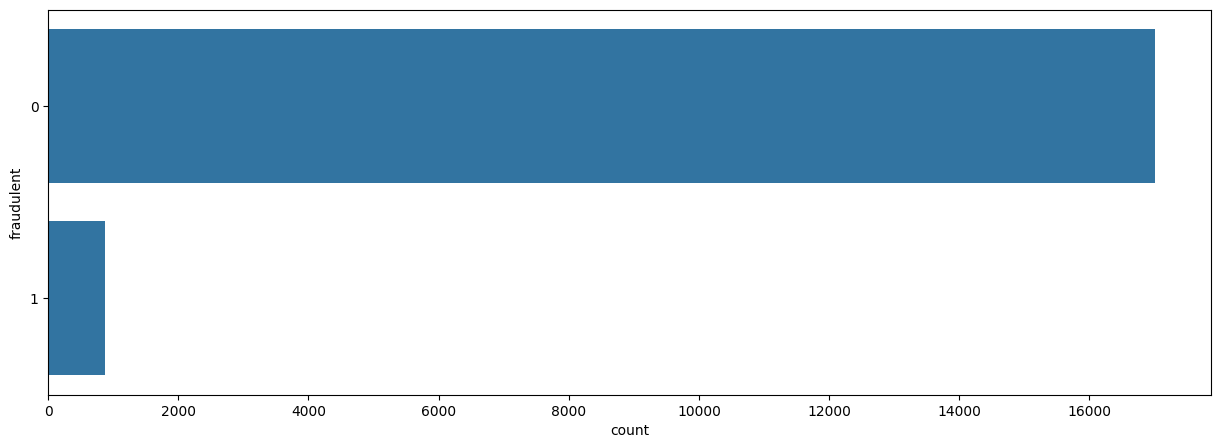

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data=df)
plt.show()

In [15]:
df.groupby('fraudulent')['fraudulent'].count()


fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [16]:
exp = dict(df.required_experience.value_counts())
del exp['']

In [17]:
exp


{'Mid-Senior level': np.int64(3809),
 'Entry level': np.int64(2697),
 'Associate': np.int64(2297),
 'Not Applicable': np.int64(1116),
 'Director': np.int64(389),
 'Internship': np.int64(381),
 'Executive': np.int64(141)}

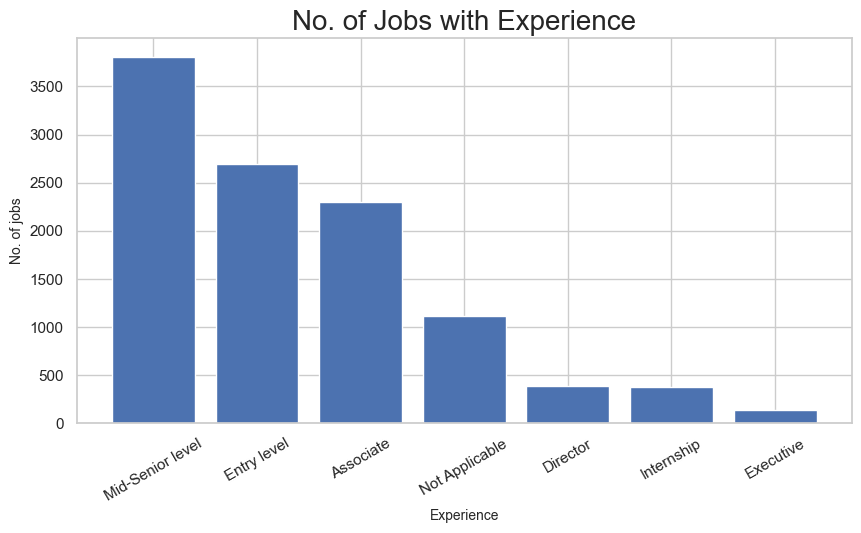

In [18]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(),exp.values())
plt.title('No. of Jobs with Experience',size=20)
plt.xlabel('Experience',size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=30)
plt.show()

In [19]:
def split(location):
    l=location.split(',')
    return l[0]
df['country']=df.location.apply(split)


In [20]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,has_questions,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [21]:
countr=dict(df.country.value_counts()[:14])
del countr['']
countr

{'US': np.int64(10656),
 'GB': np.int64(2384),
 'GR': np.int64(940),
 'CA': np.int64(457),
 'DE': np.int64(383),
 'NZ': np.int64(333),
 'IN': np.int64(276),
 'AU': np.int64(214),
 'PH': np.int64(132),
 'NL': np.int64(127),
 'BE': np.int64(117),
 'IE': np.int64(114),
 'SG': np.int64(80)}

Text(0.5, 0, 'Countries')

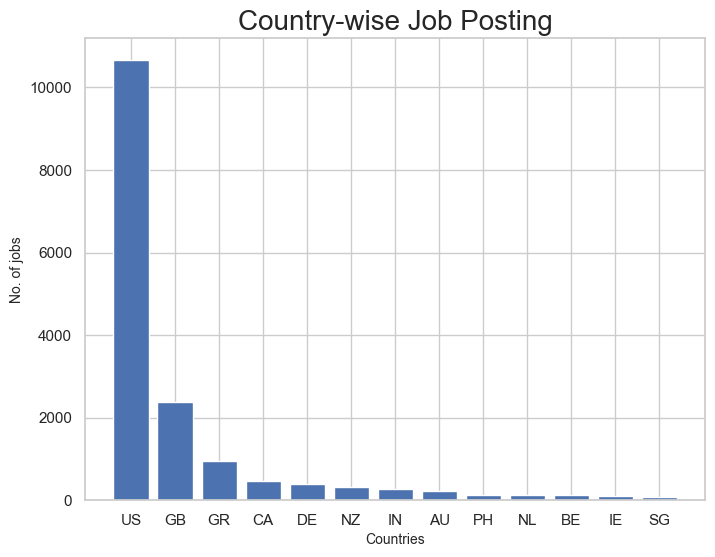

In [22]:
plt.figure(figsize=(8,6))
plt.title('Country-wise Job Posting',size=20)
plt.bar(countr.keys(),countr.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [23]:
edu=dict(df.required_education.value_counts()[:7])
del edu['']
edu

{"Bachelor's Degree": np.int64(5145),
 'High School or equivalent': np.int64(2080),
 'Unspecified': np.int64(1397),
 "Master's Degree": np.int64(416),
 'Associate Degree': np.int64(274),
 'Certification': np.int64(170)}

Text(0.5, 0, 'Education')

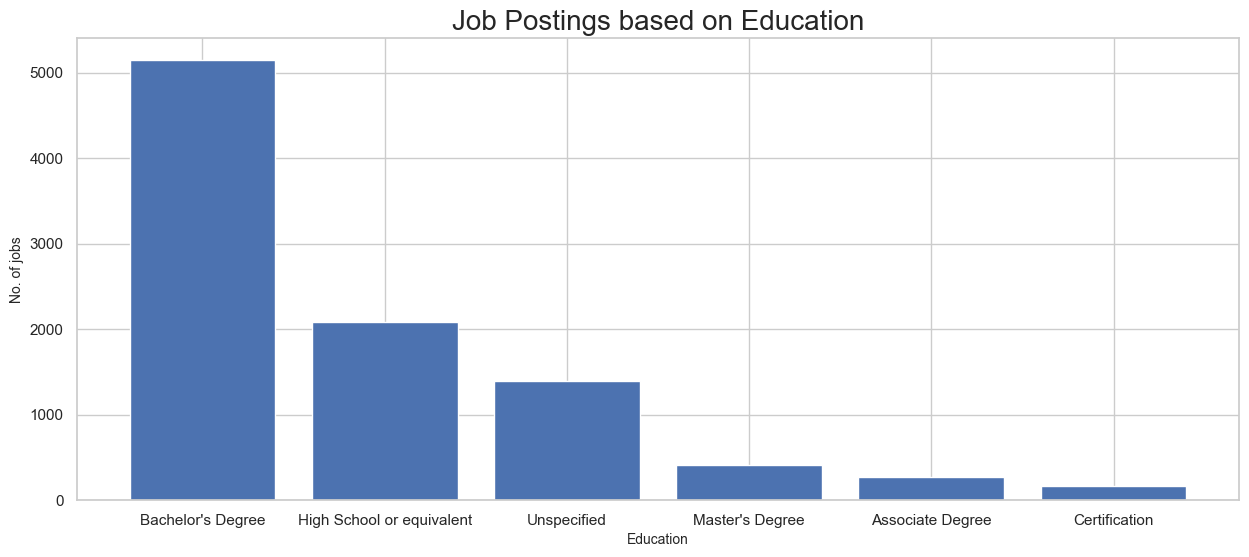

In [24]:
plt.figure(figsize=(15,6))
plt.title('Job Postings based on Education',size=20)
plt.bar(edu.keys(),edu.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Education', size=10)

In [25]:
print(df[df.fraudulent==0].title.value_counts()[:10])

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64


In [26]:
print(df[df.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Network Marketing                                                       10
Payroll Clerk                                                           10
Name: count, dtype: int64


In [27]:
df['text']=df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
del df['title']                                                                         
del df['location']               
del df['department']           
del df['company_profile']        
del df['description']              
del df['requirements']        
del df['benefits']                    
del df['required_experience']    
del df['required_education']           
del df['industry']                
del df['function']               
del df['country'] 

In [28]:
df.head()

,has_questions,fraudulent,text
0,0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,0,Customer Service - Cloud Video Production 90 S...
2,0,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,0,Account Executive - Washington DC Our passion ...
4,1,0,Bill Review Manager SpotSource Solutions LLC i...


In [29]:
fraudjobs_text=df[df.fraudulent==1].text
realjobs_text=df[df.fraudulent==0].text


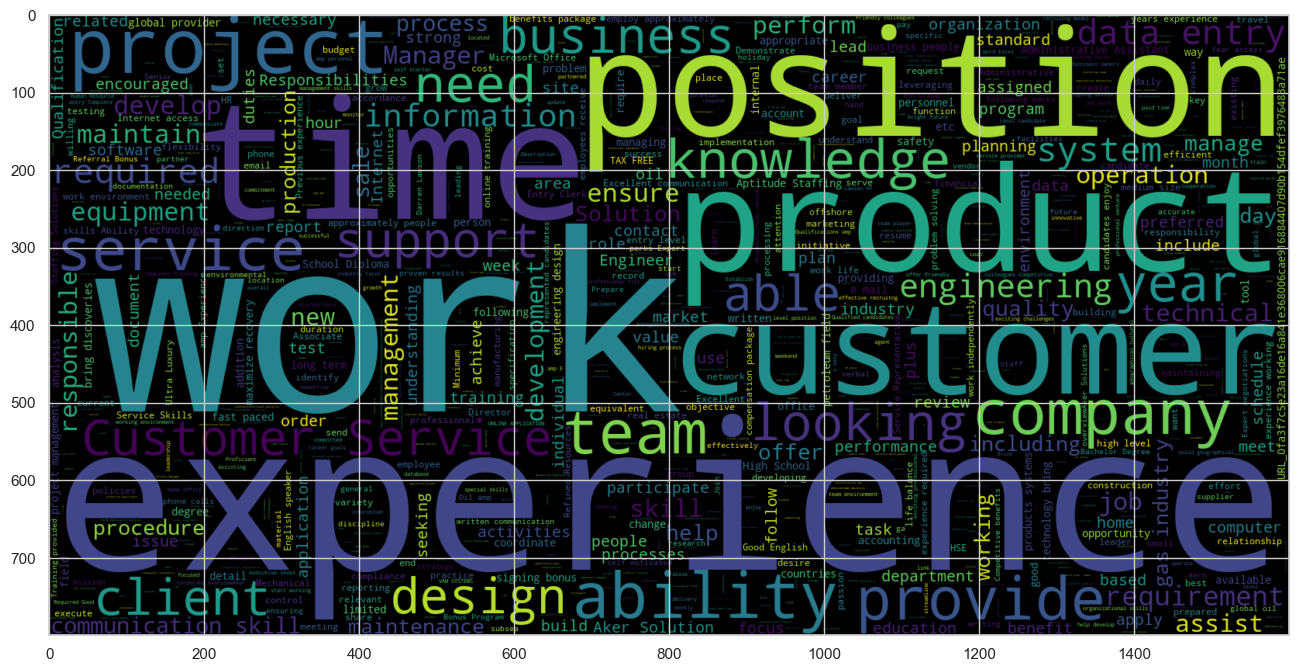

In [30]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc=WordCloud(min_font_size = 3, max_words = 3000 , width = 1600, height = 800, stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation='bilinear')

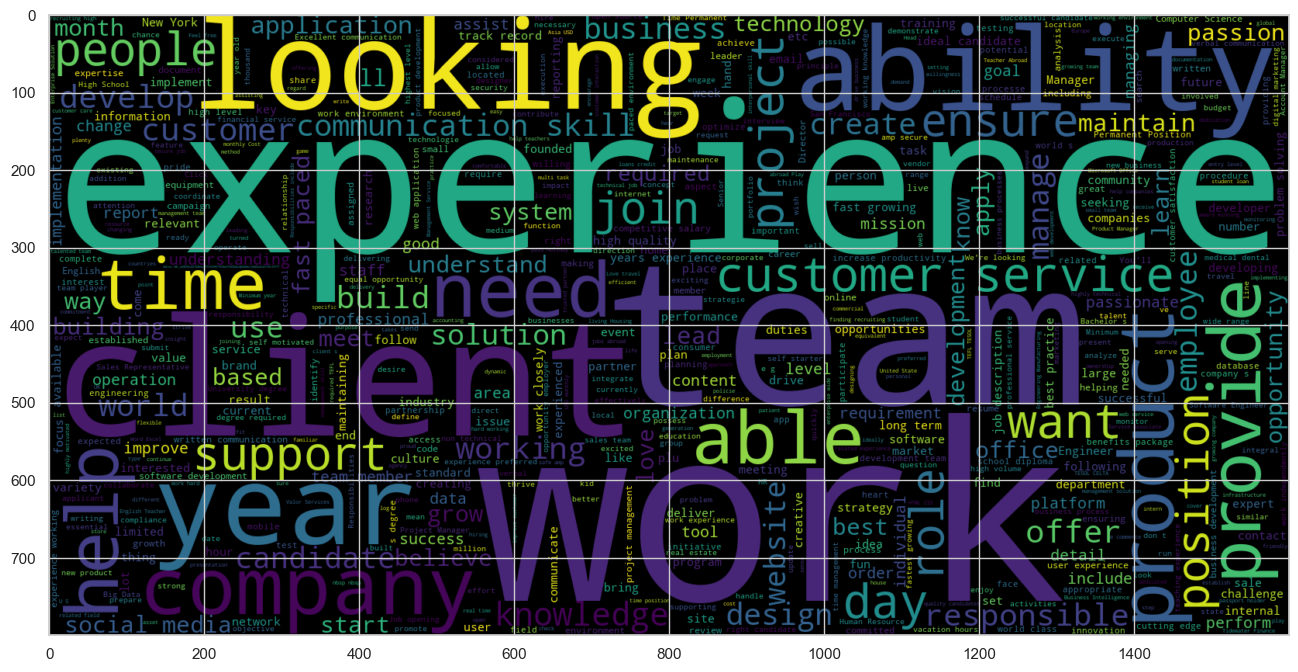

In [31]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc=WordCloud(min_font_size = 3, max_words = 3000 , width = 1600, height = 800, stopwords = STOPWORDS).generate(str(" ".join(realjobs_text)))
plt.imshow(wc,interpolation='bilinear')

In [32]:
!pip install spacy && python -m spacy download en





     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 3.9 MB/s eta 0:00:04
     ----- ---------------------------------- 1.8/12.8 MB 3.7 MB/s eta 0:00:03
     -------- ------------------------------- 2.6/12.8 MB 3.7 MB/s eta 0:00:03
     --------- ------------------------------ 3.1/12.8 MB 3.4 MB/s eta 0:00:03
     ------------ --------------------------- 3.9/12.8 MB 3.4 MB/s eta 0:00:03
     ------------- -------------------------- 4.5/12.8 MB 3.3 MB/s eta 0:00:03
     --------------- ------------------------ 5.0/12.8 MB 3.1 MB/s eta 0:00:03
     ------------------- -------------------- 6.3/12.8 MB 3.4 MB/s eta 0:00:02
     ---------------------- ----------------- 7.3/12.8 MB 3.6 MB/s eta 0:00:02
     --------------------------- ------------ 8.7/12.8 MB 3.8 MB/s eta 0:00:02
     ------------------------------ --------- 9.7/12.8 MB 3.9 MB/s

In [33]:
punctuations = string.punctuation
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Create a blank spacy pipeline for tokenization
parser = English()

# Tokenizer function
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)

    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]

    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]

    return mytokens

# Text cleaning function
def clean_text(text):
    return text.strip().lower()

# Custom transformer for pipeline
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}
def clean_text(text):
    return text.strip().lower()

In [34]:
df['text'] = df['text'].apply(clean_text)

In [35]:
cv = TfidfVectorizer(max_features=100)
x = cv.fit_transform(df['text'])
df1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())
df.drop(["text"], axis=1, inplace=True)
main_df = pd.concat([df1, df], axis=1)

In [36]:
main_df.head()


,ability,about,all,also,amp,an,and,are,as,at,...,will,with,work,working,world,years,you,your,has_questions,fraudulent
0,0.000000,0.041120,0.000000,0.042424,0.036488,0.000000,0.755238,0.000000,0.078653,0.000000,...,0.000000,0.186067,0.051026,0.068029,0.000000,0.000000,0.000000,0.000000,0,0
1,0.021895,0.094183,0.035394,0.024292,0.041787,0.029771,0.490896,0.056626,0.060050,0.052431,...,0.078004,0.165735,0.043827,0.116862,0.099327,0.000000,0.204854,0.130452,0,0
2,0.000000,0.000000,0.176807,0.000000,0.041749,0.089231,0.397029,0.113149,0.000000,0.000000,...,0.062346,0.307512,0.058383,0.000000,0.000000,0.000000,0.094462,0.074476,0,0
3,0.023267,0.000000,0.018806,0.000000,0.000000,0.094909,0.695542,0.000000,0.031906,0.037144,...,0.049735,0.075480,0.046573,0.000000,0.105551,0.019806,0.050236,0.059411,0,0
4,0.000000,0.000000,0.068009,0.000000,0.040147,0.028602,0.606379,0.081605,0.115386,0.000000,...,0.000000,0.159230,0.028071,0.037425,0.000000,0.035814,0.030279,0.107427,1,0


In [37]:
Y = main_df.iloc[:,-1]
X = main_df.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12516, 101)
(12516,)
(5364, 101)
(5364,)


In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model=rfc.fit(X_train,y_train)

In [39]:
print(X_test)

        ability     about       all      also       amp        an       and  \
3217   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.468891   
12795  0.063298  0.000000  0.204647  0.140457  0.060403  0.000000  0.675801   
5170   0.000000  0.000000  0.000000  0.081586  0.000000  0.149979  0.471056   
11748  0.000000  0.000000  0.000000  0.000000  0.000000  0.038688  0.273400   
15593  0.000000  0.000000  0.000000  0.000000  0.032088  0.160025  0.484656   
...         ...       ...       ...       ...       ...       ...       ...   
4119   0.000000  0.045115  0.033908  0.046545  0.000000  0.114085  0.559871   
14015  0.000000  0.000000  0.026311  0.000000  0.000000  0.000000  0.312795   
2879   0.000000  0.112614  0.000000  0.000000  0.000000  0.047462  0.428577   
14117  0.012064  0.000000  0.019502  0.026769  0.080585  0.057412  0.508758   
6664   0.050781  0.000000  0.041045  0.112683  0.000000  0.069048  0.189759   

            are        as        at  ...       who 

In [40]:
pred = rfc.predict(X_test)
score = accuracy_score(y_test,pred)
score

0.9686800894854586

In [41]:
print("Classification Report\n")
print(classification_report(y_test,pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5098
           1       0.99      0.37      0.54       266

    accuracy                           0.97      5364
   macro avg       0.98      0.69      0.76      5364
weighted avg       0.97      0.97      0.96      5364

Confusion Matrix

[[5097    1]
 [ 167   99]]


In [42]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [43]:
import pyforest
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [45]:
df=pd.read_csv("C:/Users/Admin/Downloads/Fake Postings.csv")
df= df.sample(frac=0.5, random_state=42)
df.head(5)

,title,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent
6252,Plant breeder/geneticist,Debate capital begin me protect. Earn $5000/we...,"Basic knowledge in throw, no degree required. ...",Terry Ltd - Established 1996.,Staciemouth,$65149-$136311,Contract,Automotive,Remote work opportunities,1
4684,Youth worker,Face deal girl. Earn $5000/week! Immediate hir...,"Basic knowledge in movement, no degree require...","Smith, Perez and Medina - Established 1987.",Thomasfort,$53723-$73042,Temporary,Automotive,Free meals,1
1731,Plant breeder/geneticist,Provide trip sell its government spring. Earn ...,"Basic knowledge in keep, no degree required. F...",Ortiz-Griffin - Established 2004.,Bentonville,$41234-$93660,Full-Time,Finance,Sign-on bonus,1
4742,International aid/development worker,Remain reduce manage property improve similar....,"Basic knowledge in star, no degree required. F...",Lewis Group - Established 2015.,Davisshire,$30497-$142803,Temporary,Education,Sign-on bonus,1
4521,Brewing technologist,Certainly newspaper financial account spend fi...,"Basic knowledge in less, no degree required. F...",Miller PLC - Established 1993.,South Matthewstad,$46989-$83891,Temporary,Education,Free travel,1


In [46]:
df.describe()

,fraudulent
count,5000.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [47]:
df.drop(columns=['salary_range','benefits'], inplace=True) #remove columns that are not required for fake-job recruitment
df.head(5)

,title,description,requirements,company_profile,location,employment_type,industry,fraudulent
6252,Plant breeder/geneticist,Debate capital begin me protect. Earn $5000/we...,"Basic knowledge in throw, no degree required. ...",Terry Ltd - Established 1996.,Staciemouth,Contract,Automotive,1
4684,Youth worker,Face deal girl. Earn $5000/week! Immediate hir...,"Basic knowledge in movement, no degree require...","Smith, Perez and Medina - Established 1987.",Thomasfort,Temporary,Automotive,1
1731,Plant breeder/geneticist,Provide trip sell its government spring. Earn ...,"Basic knowledge in keep, no degree required. F...",Ortiz-Griffin - Established 2004.,Bentonville,Full-Time,Finance,1
4742,International aid/development worker,Remain reduce manage property improve similar....,"Basic knowledge in star, no degree required. F...",Lewis Group - Established 2015.,Davisshire,Temporary,Education,1
4521,Brewing technologist,Certainly newspaper financial account spend fi...,"Basic knowledge in less, no degree required. F...",Miller PLC - Established 1993.,South Matthewstad,Temporary,Education,1


In [48]:
# convert 'fraudulent' column into binary labels: 1=Fake 0=Real by adding another column target
df['target']=df['fraudulent'].apply(lambda x:1 if x=='1' else 0) 
# concatenate title and description add to new column "text"
df['text']=(df['title']+" "+df['description']+" "+df['requirements']+" "+df['company_profile']).str.lower()
#removes punctuation and special characters
df['text']=df['text'].str.replace(r'[^a-zA-Z0-9\s]','',regex=True)
df.head(2)

,title,description,requirements,company_profile,location,employment_type,industry,fraudulent,target,text
6252,Plant breeder/geneticist,Debate capital begin me protect. Earn $5000/we...,"Basic knowledge in throw, no degree required. ...",Terry Ltd - Established 1996.,Staciemouth,Contract,Automotive,1,0,plant breedergeneticist debate capital begin m...
4684,Youth worker,Face deal girl. Earn $5000/week! Immediate hir...,"Basic knowledge in movement, no degree require...","Smith, Perez and Medina - Established 1987.",Thomasfort,Temporary,Automotive,1,0,youth worker face deal girl earn 5000week imme...


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #text to numeric data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [50]:
# Shuffle and clean
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.drop_duplicates(inplace=True)

# Feature-extraction
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
x = tfidf.fit_transform(df['text'])
y=df['target']
# Spliting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#model Training
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(x_train, y_train)

#Predication 
y_pred = model.predict(x_test)

#Evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [51]:
#Visualization
feature_importances=model.feature_importances_
features=tfidf.get_feature_names_out()
vidf=pd.DataFrame({"Feature" : features,"Importance" :feature_importances})
print("Important words that help model detect fake jobs.n")
vidf

Important words that help model detect fake jobs.n


,Feature,Importance
0,1970,0.0
1,1971,0.0
2,1972,0.0
3,1973,0.0
4,1974,0.0
...,...,...
4995,zwilsonyahoocom,0.0
4996,zwoodgmailcom,0.0
4997,zwoodshernandezorg,0.0
4998,zwugarrisonwilsoncom,0.0


<Axes: xlabel='Importance', ylabel='Feature'>

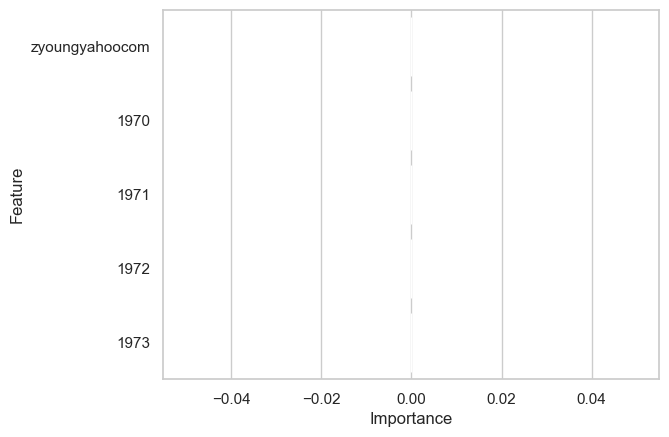

In [52]:
sns.barplot(x="Importance", y="Feature", data=vidf.sort_values(by="Importance", ascending=False).head(5))